In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
np.random.seed(42)
path = Path('../data/imgs')

In [4]:
bs = 64
data = ImageDataBunch.from_folder(path, train='train', test='test', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=bs, num_workers=4).normalize(imagenet_stats)

In [5]:
learn = cnn_learner(data, models.densenet169, metrics=[accuracy, FBeta(average='macro')])

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /home/jupyter/.cache/torch/checkpoints/densenet169-b2777c0a.pth


In [6]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.356339,0.130252,0.962533,0.960460,04:29
1,0.152007,0.039540,0.988403,0.987922,02:55
2,0.071173,0.027474,0.992640,0.992238,02:56


In [7]:
learn.save('densenet169-stage-1')

In [8]:
learn.unfreeze()

In [9]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


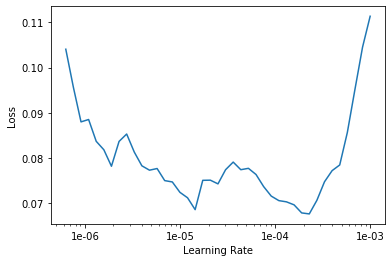

In [10]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(5, max_lr=slice(1e-4, 2e-3))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.339763,0.123280,0.958742,0.956676,02:42
1,0.220378,0.069806,0.977921,0.977022,02:43
2,0.113758,0.052207,0.982828,0.981203,02:43
3,0.058323,0.022796,0.993756,0.993319,02:42
4,0.040220,0.018468,0.994871,0.994605,02:42


In [14]:
learn.save('densenet169-stage-2')

In [17]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


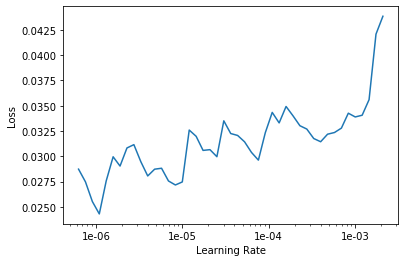

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.039746,0.018539,0.994871,0.994659,02:39
1,0.034468,0.017471,0.994648,0.994414,02:39
2,0.031983,0.018058,0.994871,0.994667,02:38
3,0.028237,0.018120,0.994648,0.994422,02:39
4,0.031073,0.017085,0.995317,0.995176,02:39


In [21]:
learn.save('densenet169-stage-3')

In [22]:
learn.export()